In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [14]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2024-03-19 22:22:55.037307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [70295]
	 [[{{node Placeholder/_4}}]]
2024-03-19 22:22:55.037514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [70295]
	 [[{{node Placeholder/_4}}]]
2024-03-19 22:22:55.284190: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2197/2197 [==============================] - ETA: 0s - loss: 1.3525 - accuracy: 0.6019

2024-03-19 23:32:57.792746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [17572]
	 [[{{node Placeholder/_0}}]]
2024-03-19 23:32:57.793191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]


2197/2197 [==============================] - 4451s 2s/step - loss: 1.3525 - accuracy: 0.6019 - val_loss: 0.5447 - val_accuracy: 0.8286
Epoch 2/10
2197/2197 [==============================] - 3349s 2s/step - loss: 0.4292 - accuracy: 0.8658 - val_loss: 0.2656 - val_accuracy: 0.9118
Epoch 3/10
2197/2197 [==============================] - 2729s 1s/step - loss: 0.2524 - accuracy: 0.9183 - val_loss: 0.1622 - val_accuracy: 0.9468
Epoch 4/10
2197/2197 [==============================] - 3781s 2s/step - loss: 0.1779 - accuracy: 0.9421 - val_loss: 0.1584 - val_accuracy: 0.9492
Epoch 5/10
2197/2197 [==============================] - 3789s 2s/step - loss: 0.1262 - accuracy: 0.9586 - val_loss: 0.1633 - val_accuracy: 0.9490
Epoch 6/10
2197/2197 [==============================] - 2743s 1s/step - loss: 0.1004 - accuracy: 0.9675 - val_loss: 0.1785 - val_accuracy: 0.9451
Epoch 7/10
2197/2197 [==============================] - 3080s 1s/step - loss: 0.0853 - accuracy: 0.9721 - val_loss: 0.1288 - val_accura

In [18]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


2197/2197 [==============================] - 520s 237ms/step - loss: 0.0224 - accuracy: 0.9935
Training accuracy: 0.9935414791107178


In [19]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 155s 282ms/step - loss: 0.0999 - accuracy: 0.9702
Validation accuracy: 0.9702367186546326


In [20]:
cnn.save('trained_plant_disease_model.keras')

In [21]:
training_history.history

{'loss': [1.3524935245513916,
  0.42919161915779114,
  0.2524036467075348,
  0.17788249254226685,
  0.12624651193618774,
  0.10041119158267975,
  0.08528978377580643,
  0.07415634393692017,
  0.05820435658097267,
  0.05638952925801277],
 'accuracy': [0.6018920540809631,
  0.8657941818237305,
  0.9183014631271362,
  0.9421011209487915,
  0.9585887789726257,
  0.9674514532089233,
  0.9721032977104187,
  0.975986897945404,
  0.9810939431190491,
  0.9816487431526184],
 'val_loss': [0.5447146892547607,
  0.26563143730163574,
  0.1621825248003006,
  0.1583995223045349,
  0.1633339375257492,
  0.17845256626605988,
  0.12878622114658356,
  0.16101892292499542,
  0.12604445219039917,
  0.09991973638534546],
 'val_accuracy': [0.8286478519439697,
  0.9118483662605286,
  0.946790337562561,
  0.949180543422699,
  0.948952853679657,
  0.94514000415802,
  0.9594240784645081,
  0.9517413973808289,
  0.963350772857666,
  0.9702367186546326]}

In [22]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


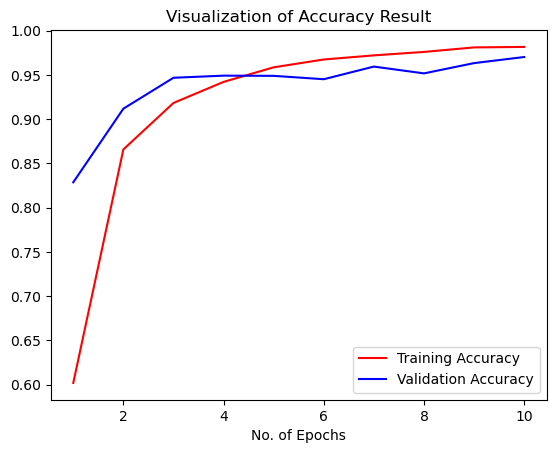

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [25]:
class_name = validation_set.class_names

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

    6/17572 [..............................] - ETA: 3:08 

2024-03-20 09:16:47.275714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [17572]
	 [[{{node Placeholder/_0}}]]
2024-03-20 09:16:47.276127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]


17572/17572 [==============================] - 216s 12ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [30]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.95      0.95       504
                                 Apple___Black_rot       0.95      1.00      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.95      0.99      0.97       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.95      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

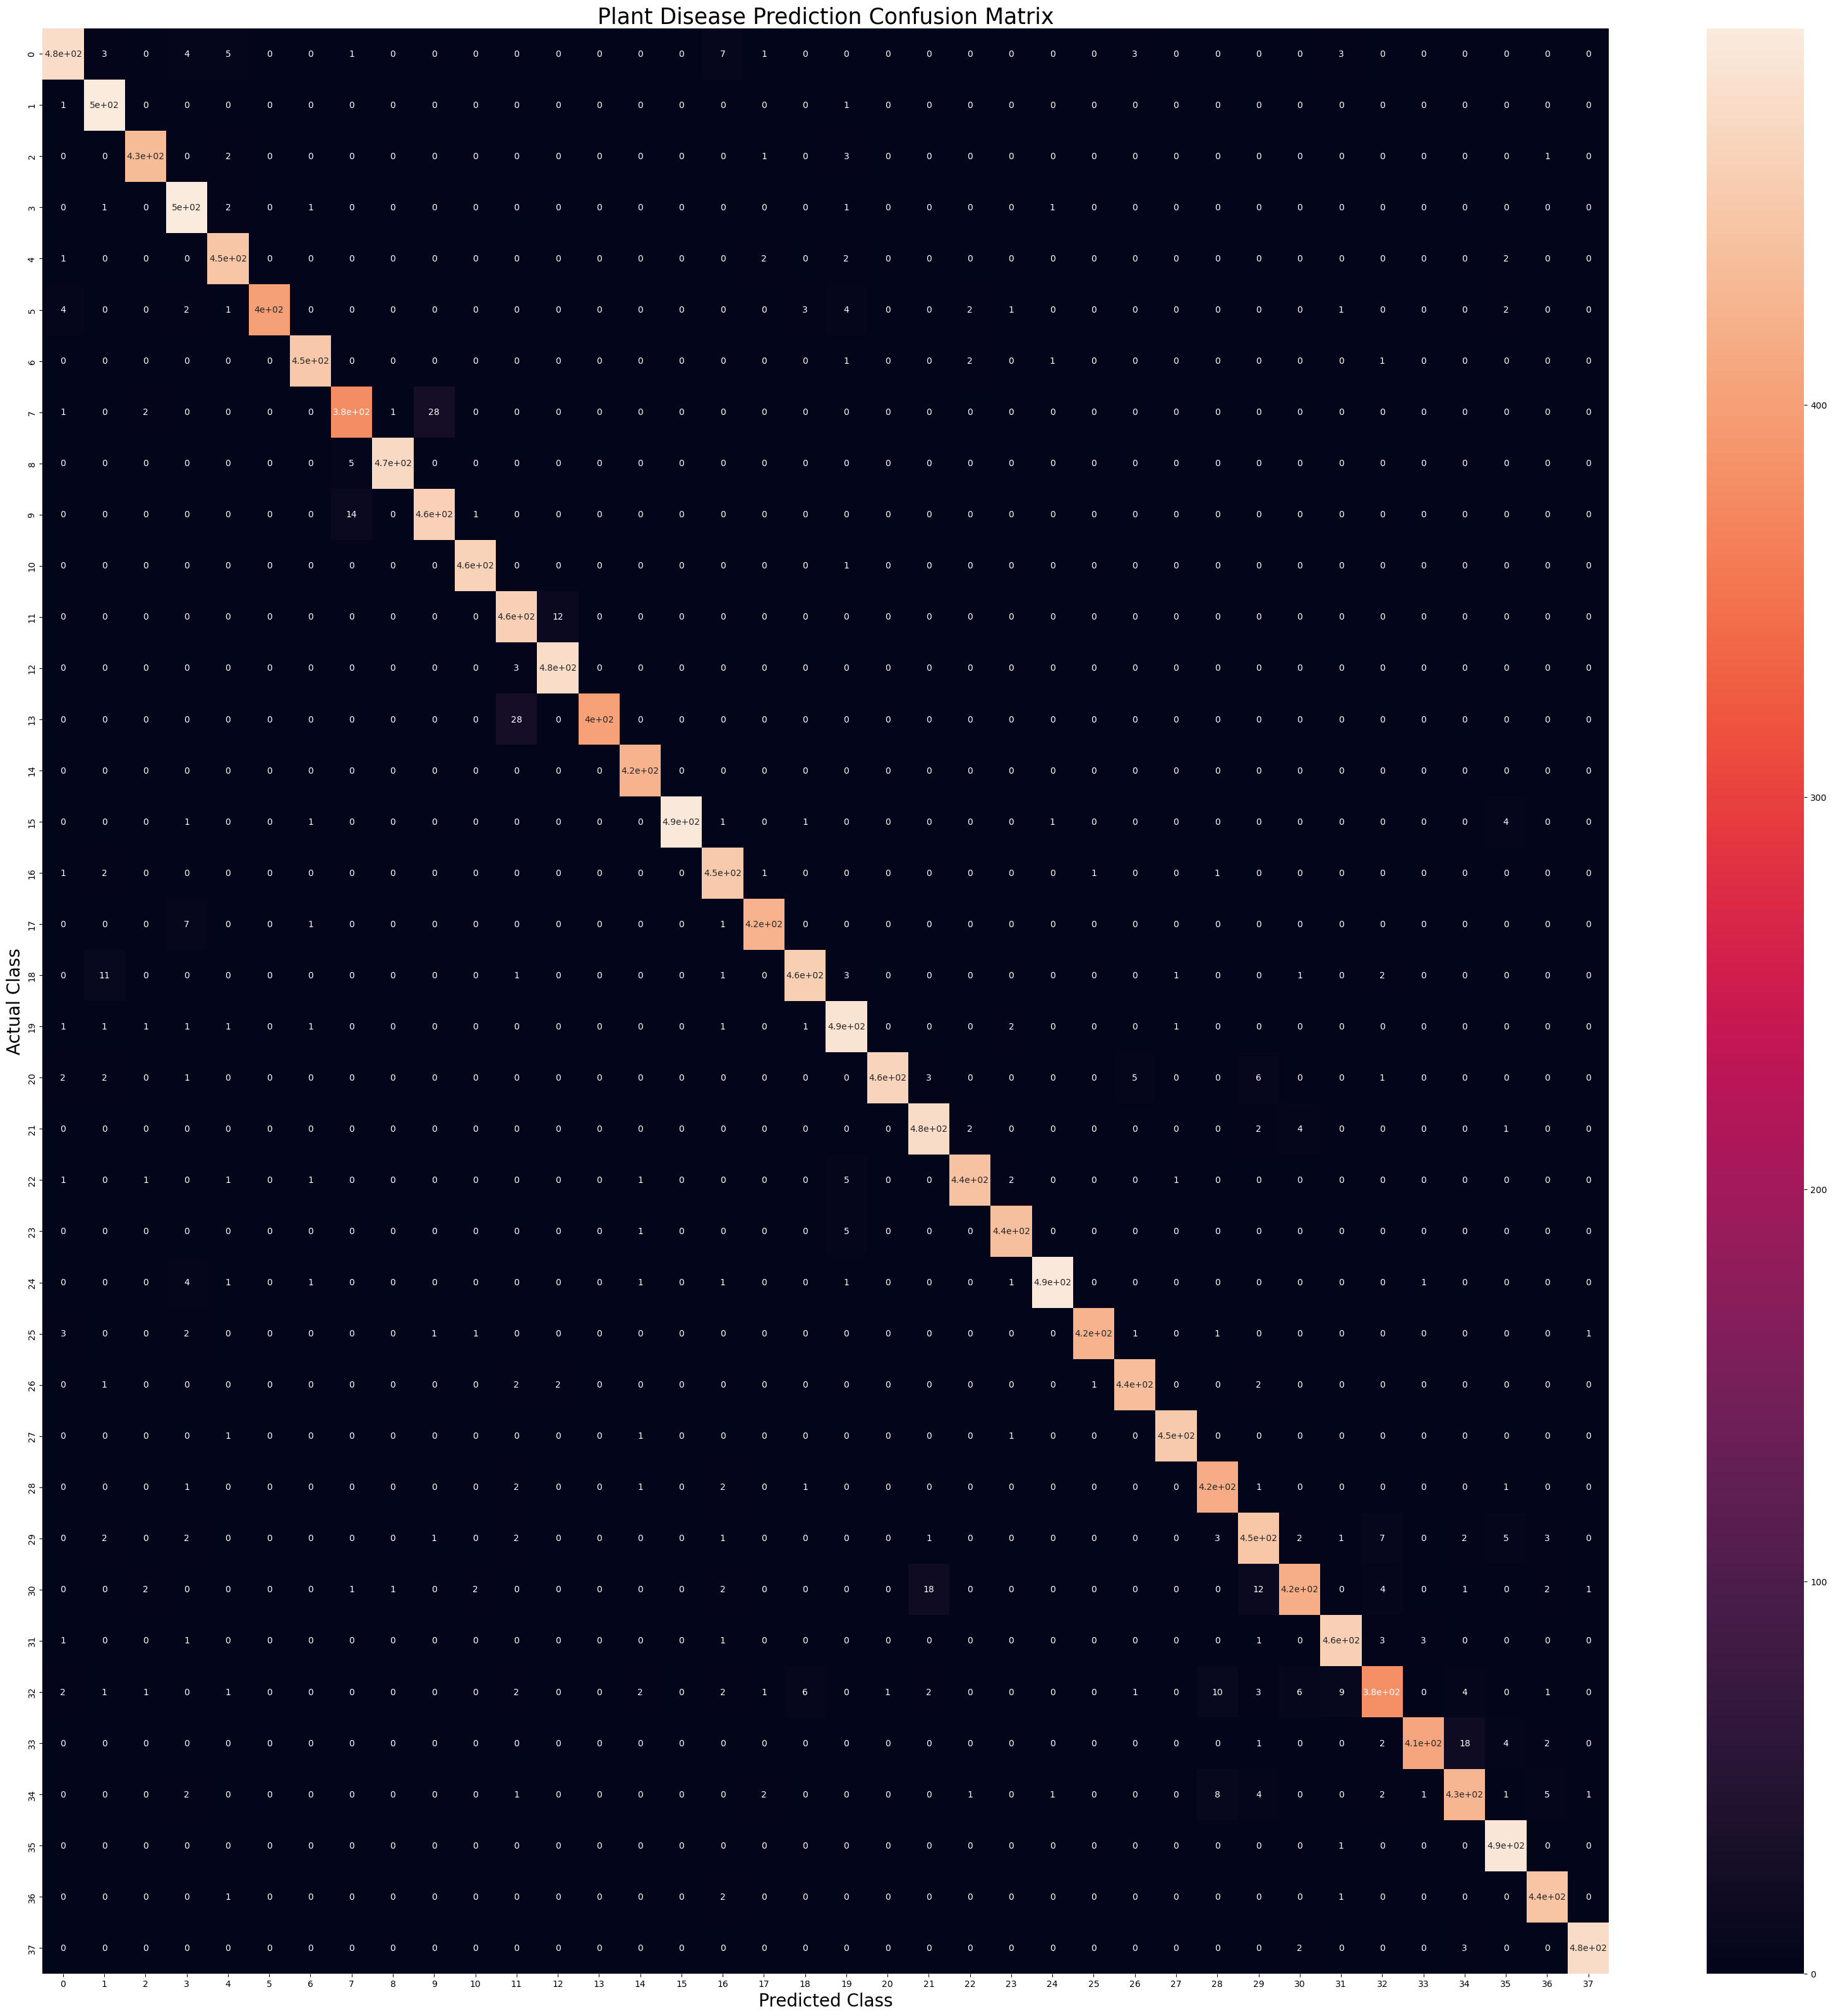

In [33]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()